# Phase 2 - Training the Model
This process show how to train and find the best model for predicting the house pricing

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
# import dataset
df = pd.read_csv('data/cleaned/rumah_data_cleaned.csv')
df.head()

,city,title,price,location,area,building_area,bedrooms,bathrooms,garage
0,Jakarta Selatan,Dijual Rumah Sultan Mewah Full Furnish Di Kema...,45000.0,"Kemang, Jakarta Selatan",730.0,1100.0,7.0,8.0,10.0
1,Jakarta Selatan,"Rumah Mewah 3 Lantai Ada Roof Top, Dalam Kompl...",7910.0,"Pondok Indah, Jakarta Selatan",128.0,302.0,3.0,3.0,2.0
2,Jakarta Selatan,Rumah 1 Lantai Di Cipete Kebayoran Baru Lokasi...,14500.0,"Cipete, Jakarta Selatan",518.0,450.0,5.0,6.0,5.0
3,Jakarta Selatan,Rumah Bagus Rapih Siap Huni di Sektor 6 Bintar...,3000.0,"Bintaro, Jakarta Selatan",120.0,90.0,4.0,2.0,0.0
4,Jakarta Selatan,Dijual Rumah Cluster Private Pool Di Kebagusan...,4250.0,"Kebagusan, Jakarta Selatan",127.0,280.0,6.0,5.0,1.0


## Split Training & Test Data

In [7]:
# feature X for varables except price
X = df[['area','building_area','bedrooms','bathrooms','garage']]
# target y for price variable
y = df['price']

Split training and testing data
- Training 75%
- Testing 25%


In [9]:
# separate test and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"Training data shape: {len(X_train)}")
print(f"Test data shape: {len(X_test)}")

Training data shape: 1845
Test data shape: 616


### Model Linear Regression

In [ ]:
# train model - Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [11]:
# predict test data
y_pred_lr = model_lr.predict(X_test)

In [12]:
# check prediction results from index 0 to 10
for i in range(10):
    print(f"Actual Price: {y_test.values[i]}, Predicted Price: {y_pred_lr[i]}")

Actual Price: 4600.0, Predicted Price: 12486.428598607466
Actual Price: 890.0, Predicted Price: 263.83018768753664
Actual Price: 790.0, Predicted Price: 214.16483572887955
Actual Price: 86.6, Predicted Price: 5839.652314734687
Actual Price: 412.0, Predicted Price: 126.26544673344551
Actual Price: 2200.0, Predicted Price: 265.88808451945533
Actual Price: 4200.0, Predicted Price: 4097.721270984584
Actual Price: 498.0, Predicted Price: -2069.1114612861575
Actual Price: 3870.0, Predicted Price: 9468.63535214604
Actual Price: 4750.0, Predicted Price: 3121.9455170165984


In [13]:
# evaluate model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)

print(f"Linear Regression MAE: {mae_lr}")
print(f"Linear Regression MSE: {mse_lr}")

Linear Regression MAE: 3545.762997865306
Linear Regression MSE: 71743927.51269975


## Feature Engineering

In [16]:
# data distribution check
def check_distribution(df, column_to_plot):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
    axes = axes.flatten()

    for i, column in enumerate(column_to_plot):
        sns.histplot(df[column], kde=True, ax=axes[i], color='blue')
        axes[i].set_title(f'Distribution of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

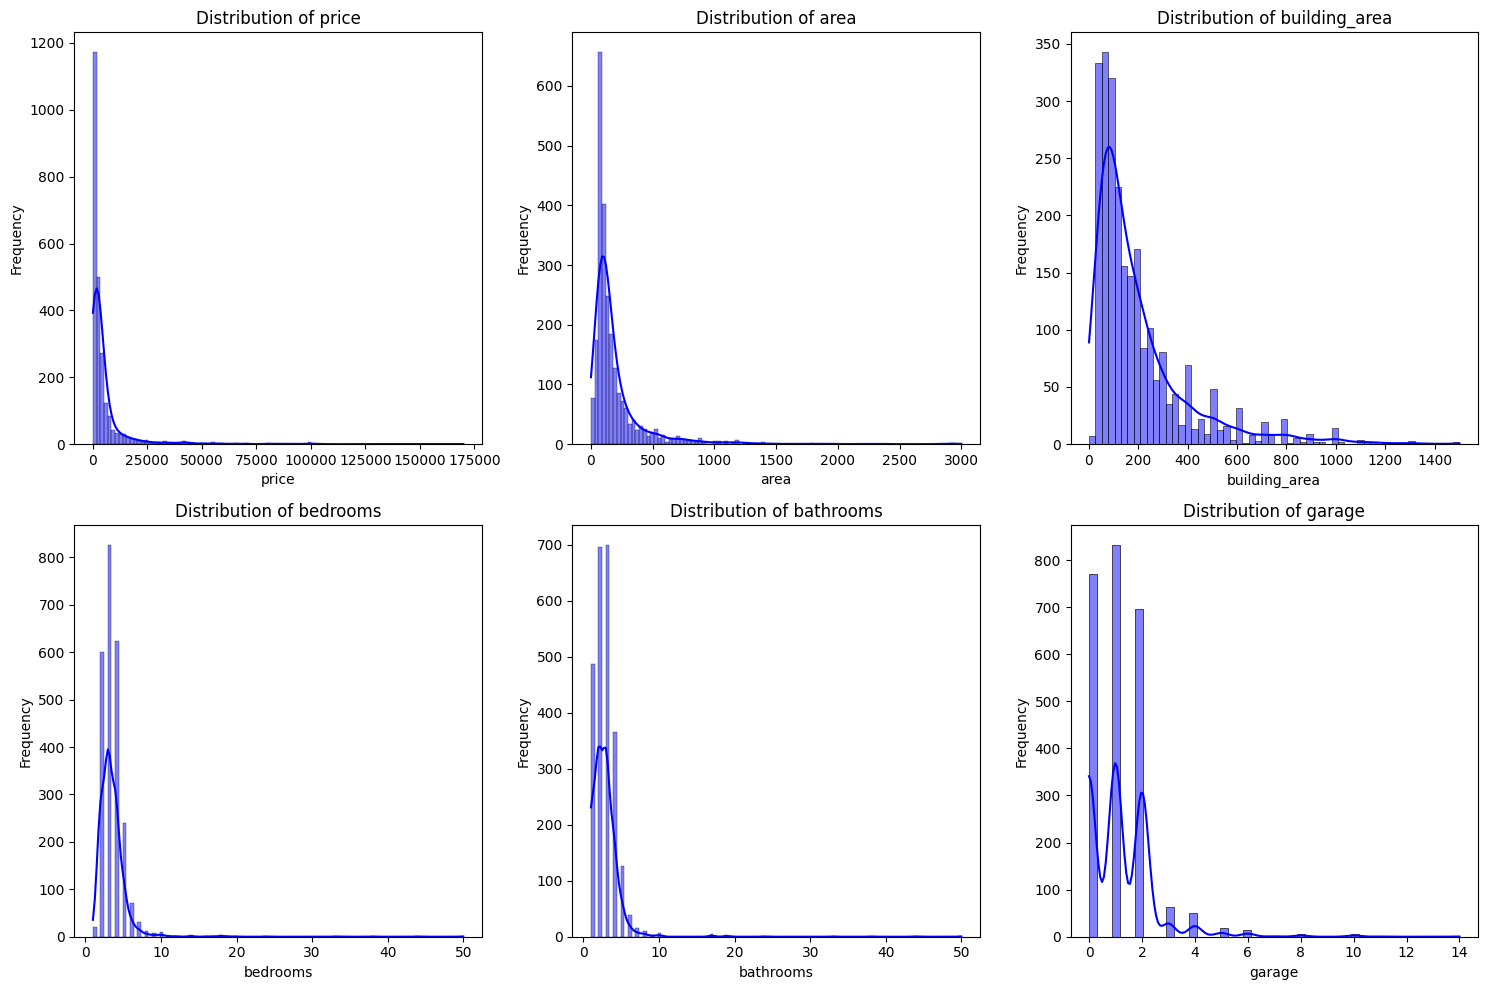

In [18]:
check_distribution(df, ['price', 'area', 'building_area', 'bedrooms', 'bathrooms', 'garage'])

In [20]:
# check outlier price
# price above 20000 (20M)
df[df['price'] > 20000]

,city,title,price,location,area,building_area,bedrooms,bathrooms,garage
0,Jakarta Selatan,Dijual Rumah Sultan Mewah Full Furnish Di Kema...,45000.0,"Kemang, Jakarta Selatan",730.0,1100.0,7.0,8.0,10.0
7,Jakarta Selatan,"Dijual Rumah Hitung Tanah Harga Dibawah Njop,...",21500.0,"Kebayoran Lama, Jakarta Selatan",1322.0,500.0,5.0,3.0,0.0
8,Jakarta Selatan,Dijual Cepat Perumahan Mewah Simprug Jak-Sel,25000.0,"Simprug, Jakarta Selatan",662.0,500.0,4.0,4.0,1.0
12,Jakarta Selatan,Rumah 2 Lantai Simprug Golf Siap Huni Ada Tama...,45000.0,"Senayan, Jakarta Selatan",712.0,500.0,6.0,5.0,3.0
16,Jakarta Selatan,Antasari Raya Dibawah Njop,68000.0,"Antasari, Jakarta Selatan",2950.0,750.0,4.0,4.0,6.0
...,...,...,...,...,...,...,...,...,...
1949,surabaya,Rumah Jl. Arjuna Harga Hitung Tanah Pusat Kota...,45000.0,"Sawahan, Surabaya",1630.0,1000.0,7.0,5.0,2.0
1969,surabaya,18 Juta Per Mtr ! Long Golf View Main Road Cit...,35000.0,"Citraland, Surabaya",1898.0,400.0,5.0,3.0,2.0
1984,malang,Murah Langka Rumah Vintage Tengah Kota Malang ...,23000.0,"Malang Kota, Malang",1153.0,790.0,5.0,3.0,4.0
1992,malang,Rumah Vintage Terawat Di Area Ijen Gunung Gunu...,42000.0,"Klojen, Malang",900.0,500.0,8.0,4.0,2.0


In [21]:
df_no_outlier = df[df['price'] <= 20000]
df_no_outlier.shape

(2336, 9)

In [23]:
print(f'original df: {len(df)}')
print(f'removed outlier: {len(df) - len(df_no_outlier)}')

original df: 2461
removed outlier: 125


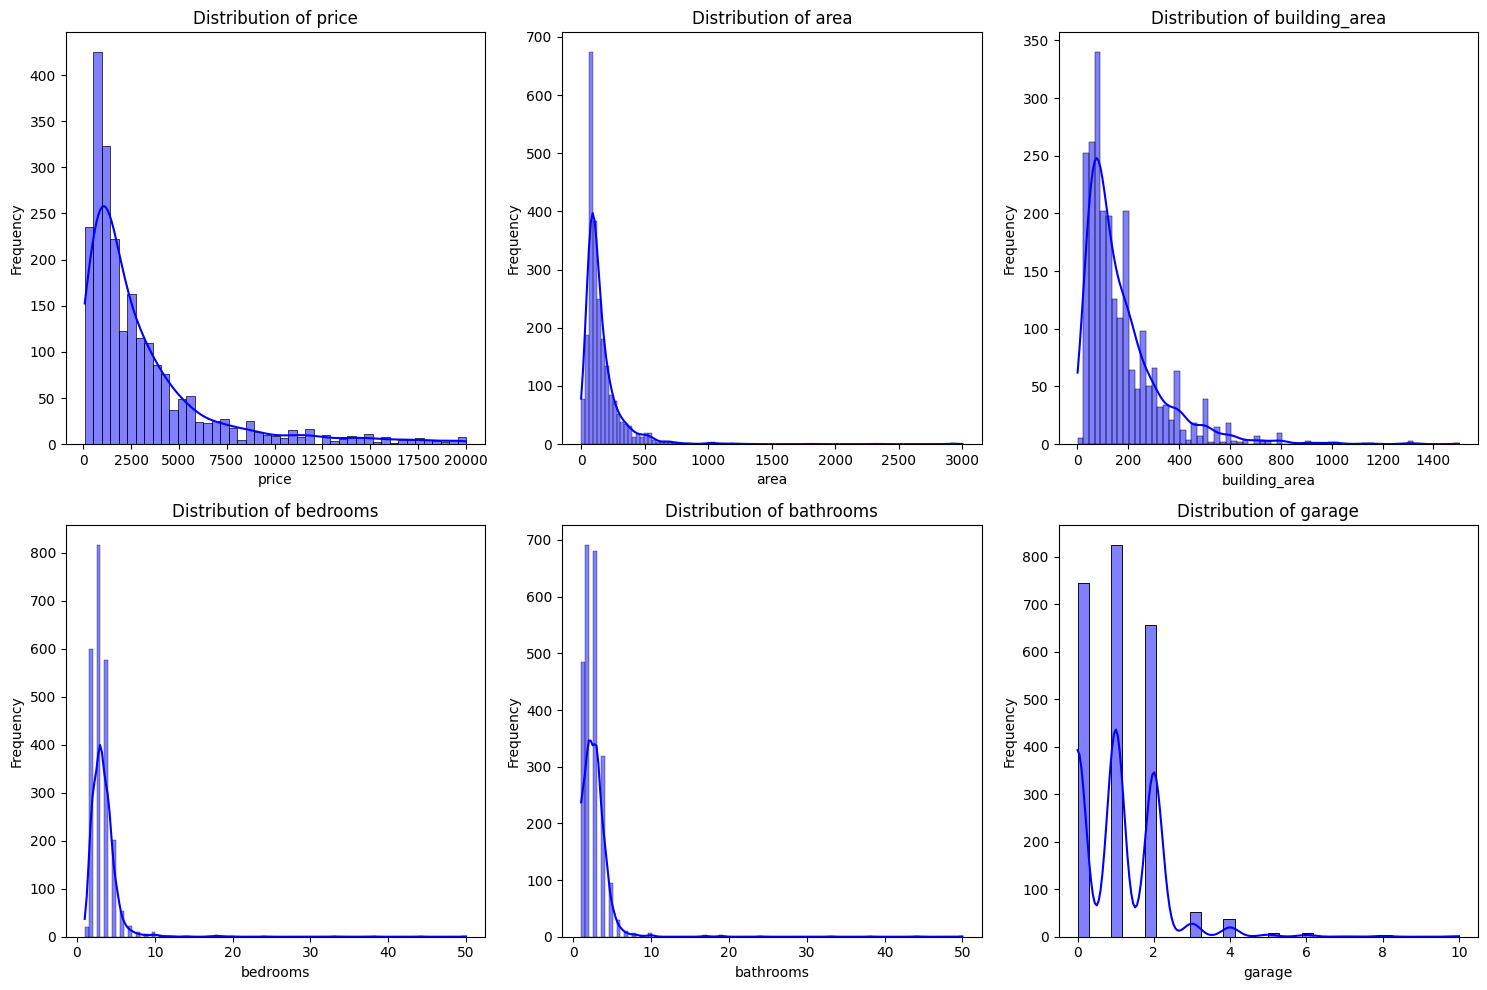

In [25]:
check_distribution(df_no_outlier, ['price', 'area', 'building_area', 'bedrooms', 'bathrooms', 'garage'])

## Feature Scaling

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
feature_scaler = StandardScaler()
price_scaler = StandardScaler()

df_normalized = df_no_outlier.copy()
df_normalized[['area', 'building_area']] = feature_scaler.fit_transform(df_normalized[['area', 'building_area']])
df_normalized[['price']] = price_scaler.fit_transform(df_normalized[['price']])

In [28]:
df_normalized[['area', 'building_area', 'price']]

,area,building_area,price
1,-0.194298,0.809216,1.332233
2,1.952980,1.754051,3.167022
3,-0.238344,-0.544197,-0.034810
4,-0.199804,0.668767,0.313215
5,-0.689823,-0.608037,-0.626453
...,...,...,...
2456,-0.502625,-0.735717,-0.797681
2457,-0.502625,-0.927238,-0.821904
2458,-0.403520,1.428465,-0.842368
2459,-0.700835,4.965213,-0.842507


### Encode Categorical Data

In [29]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2336 entries, 1 to 2460
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   city           2336 non-null   object 
 1   title          2336 non-null   object 
 2   price          2336 non-null   float64
 3   location       2336 non-null   object 
 4   area           2336 non-null   float64
 5   building_area  2336 non-null   float64
 6   bedrooms       2336 non-null   float64
 7   bathrooms      2336 non-null   float64
 8   garage         2336 non-null   float64
dtypes: float64(6), object(3)
memory usage: 182.5+ KB


In [45]:
df_one_hot = df_normalized.copy()

df_one_hot = pd.get_dummies(df_one_hot, columns=['city'], prefix='City')
df_one_hot = pd.get_dummies(df_one_hot, columns=['bedrooms'], prefix='Bedrooms')
df_one_hot = pd.get_dummies(df_one_hot, columns=['bathrooms'], prefix='Bathrooms')
df_one_hot = pd.get_dummies(df_one_hot, columns=['garage'], prefix='Garage')

df_one_hot.columns

Index(['title', 'price', 'location', 'area', 'building_area', 'City_Bekasi',
       'City_Bogor', 'City_Depok', 'City_Jakarta Barat', 'City_Jakarta Pusat',
       'City_Jakarta Selatan', 'City_Jakarta Timur', 'City_Jakarta Utara',
       'City_Tangerang', 'City_Tangerang Selatan', 'City_bulukumba',
       'City_gowa', 'City_makassar', 'City_malang', 'City_maros',
       'City_palopo', 'City_parepare', 'City_sidoarjo', 'City_surabaya',
       'City_takalar', 'Bedrooms_1.0', 'Bedrooms_2.0', 'Bedrooms_3.0',
       'Bedrooms_4.0', 'Bedrooms_5.0', 'Bedrooms_6.0', 'Bedrooms_7.0',
       'Bedrooms_8.0', 'Bedrooms_9.0', 'Bedrooms_10.0', 'Bedrooms_11.0',
       'Bedrooms_12.0', 'Bedrooms_14.0', 'Bedrooms_17.0', 'Bedrooms_18.0',
       'Bedrooms_19.0', 'Bedrooms_20.0', 'Bedrooms_24.0', 'Bedrooms_33.0',
       'Bedrooms_38.0', 'Bedrooms_44.0', 'Bedrooms_50.0', 'Bathrooms_1.0',
       'Bathrooms_2.0', 'Bathrooms_3.0', 'Bathrooms_4.0', 'Bathrooms_5.0',
       'Bathrooms_6.0', 'Bathrooms_7.0', 'Bath

In [46]:
df_one_hot[['City_malang','Bathrooms_44.0']]

,City_malang,Bathrooms_44.0
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
...,...,...
2456,False,False
2457,False,False
2458,False,False
2459,False,False


In [47]:
# re-split data
X2 = df_one_hot.drop(columns=['title', 'price', 'location'])
y2 = df_one_hot['price']

In [49]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=42)

print(f"Training data shape: {len(X2_train)}")
print(f"Test data shape: {len(X2_test)}")

Training data shape: 1752
Test data shape: 584


## Re-create the Model

### Linear Regression

In [50]:
model_lr2 = LinearRegression()
model_lr2.fit(X2_train, y2_train)
y_pred_lr2 = model_lr2.predict(X2_test)

In [51]:
mae_lr2 = mean_absolute_error(y2_test, y_pred_lr2)
mse_lr2 = mean_squared_error(y2_test, y_pred_lr2)

print(f"Linear Regression MAE: {mae_lr2}")
print(f"Linear Regression MSE: {mse_lr2}")

Linear Regression MAE: 0.2962908667745224
Linear Regression MSE: 0.25667282366693556


### Lasso Regression

In [52]:
lasso_model = Lasso(alpha=0.01)

lasso_model.fit(X2_train, y2_train)

y_pred_lasso = lasso_model.predict(X2_test)

In [53]:
lasso_mae = mean_absolute_error(y2_test, y_pred_lasso)
lasso_mse = mean_squared_error(y2_test, y_pred_lasso)

print(f"Lasso Regression MAE: {lasso_mae}")
print(f"Lasso Regression MSE: {lasso_mse}")

Lasso Regression MAE: 0.2793716910324718
Lasso Regression MSE: 0.2209846694002811


### Ridge Regression

In [54]:
ridge_model = Ridge(alpha=9)
ridge_model.fit(X2_train, y2_train)
y_pred_ridge = ridge_model.predict(X2_test)

In [55]:
ridge_mae = mean_absolute_error(y2_test, y_pred_ridge)
ridge_mse = mean_squared_error(y2_test, y_pred_ridge)

print(f"Ridge Regression MAE: {ridge_mae}")
print(f"Ridge Regression MSE: {ridge_mse}")

Ridge Regression MAE: 0.27770431168464055
Ridge Regression MSE: 0.19980129080958434


### Random Forest Regressor

In [57]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
# define the model
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
    )

# fit the model
rf_model.fit(X2_train, y2_train)

# prediction
y_pred_rf = rf_model.predict(X2_test)

In [59]:
rf_mae = mean_absolute_error(y2_test, y_pred_rf)
rf_mse = mean_squared_error(y2_test, y_pred_rf)

print(f"Random Forest Regressor MAE: {rf_mae}")
print(f"Random Forest Regressor MSE: {rf_mse}")

Random Forest Regressor MAE: 0.2284310781940732
Random Forest Regressor MSE: 0.17444634280851914


### Neural Network

In [60]:
from sklearn.neural_network import MLPRegressor

In [63]:
# define the model
nn_model = MLPRegressor(
    hidden_layer_sizes=(150),
    activation='relu',
    max_iter=1000,
    random_state=42
    )

# fit the model
nn_model.fit(X2_train, y2_train)

# prediction
y_pred_nn = nn_model.predict(X2_test)

In [64]:
nn_mae = mean_absolute_error(y2_test, y_pred_nn)
nn_mse = mean_squared_error(y2_test, y_pred_nn)

print(f"Neural Network  MAE: {nn_mae}")
print(f"Neural Network  MSE: {nn_mse}")

Neural Network  MAE: 0.28230709950502114
Neural Network  MSE: 0.2565890087346851


## Save the best Model
From experimentation we found that Random Forest Regressor has the least error mean both for MAE and MSE

In [65]:
import joblib
import os

# create model directory
model_dir = 'models'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# extract the features
features = X2.columns.tolist()

# save list columns
joblib.dump(features, os.path.join(model_dir, 'feature_columns.pkl'))
# save the scaler
joblib.dump(feature_scaler,  os.path.join(model_dir, 'feature_scaler.pkl'))
joblib.dump(price_scaler,  os.path.join(model_dir, 'price_scaler.pkl'))
# save the model
joblib.dump(rf_model, os.path.join(model_dir, 'rf_model.pkl'))

print("Model and related artifacts have been saved successfully.")


Model and related artifacts have been saved successfully.
